In [3]:
import numpy as np
from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.spatial_windows import BoxWindow
from structure_factor.hyperuniformity import subwindows, multiscale_test
import matplotlib.pyplot as plt
import pandas as pd  # for CSV output
from structure_factor.data import load_data
from structure_factor.hyperuniformity import effective_hyperuniformity
from structure_factor.point_processes import GinibrePointProcess
from structure_factor.structure_factor import StructureFactor
from structure_factor.tapered_estimators_isotropic import (
    allowed_k_norm_bartlett_isotropic,
)
from structure_factor.spatial_windows import BallWindow
import structure_factor.utils as utils
import matplotlib.pyplot as plt
from structure_factor.hyperuniformity import bin_data
from structure_factor.point_processes import HomogeneousPoissonPointProcess
from structure_factor.spatial_windows import BoxWindow
from pathlib import Path


from matplotlib import rcParams
from scipy.stats import linregress
import os
import cv2

FS=14
rcParams['figure.dpi']  = 600
rcParams['savefig.dpi'] = 600
rcParams['font.size'] = FS
rcParams['font.family'] = 'StixGeneral'
rcParams["mathtext.fontset"] = 'stix'
# rcParams["mathtext.default"] = "it" 
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
plt.rc('font', size=FS)          # controls default text sizes
plt.rc('axes', labelsize=FS)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=FS)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FS)    # fontsize of the tick labels
plt.rc('legend', fontsize=FS-3)    # legend fontsize
plt.rc('figure', titlesize=FS+2)   # fontsize of the figure title


output_dir_data =Path("./Fig2_Lowrow")
output_dir_data.mkdir(parents=True, exist_ok=True)


## (1) Poisson point process S(k) 

(2707, 2)
(2118,)
Saved CSV: Fig2_Lowrow/Poisson_point_process.csv


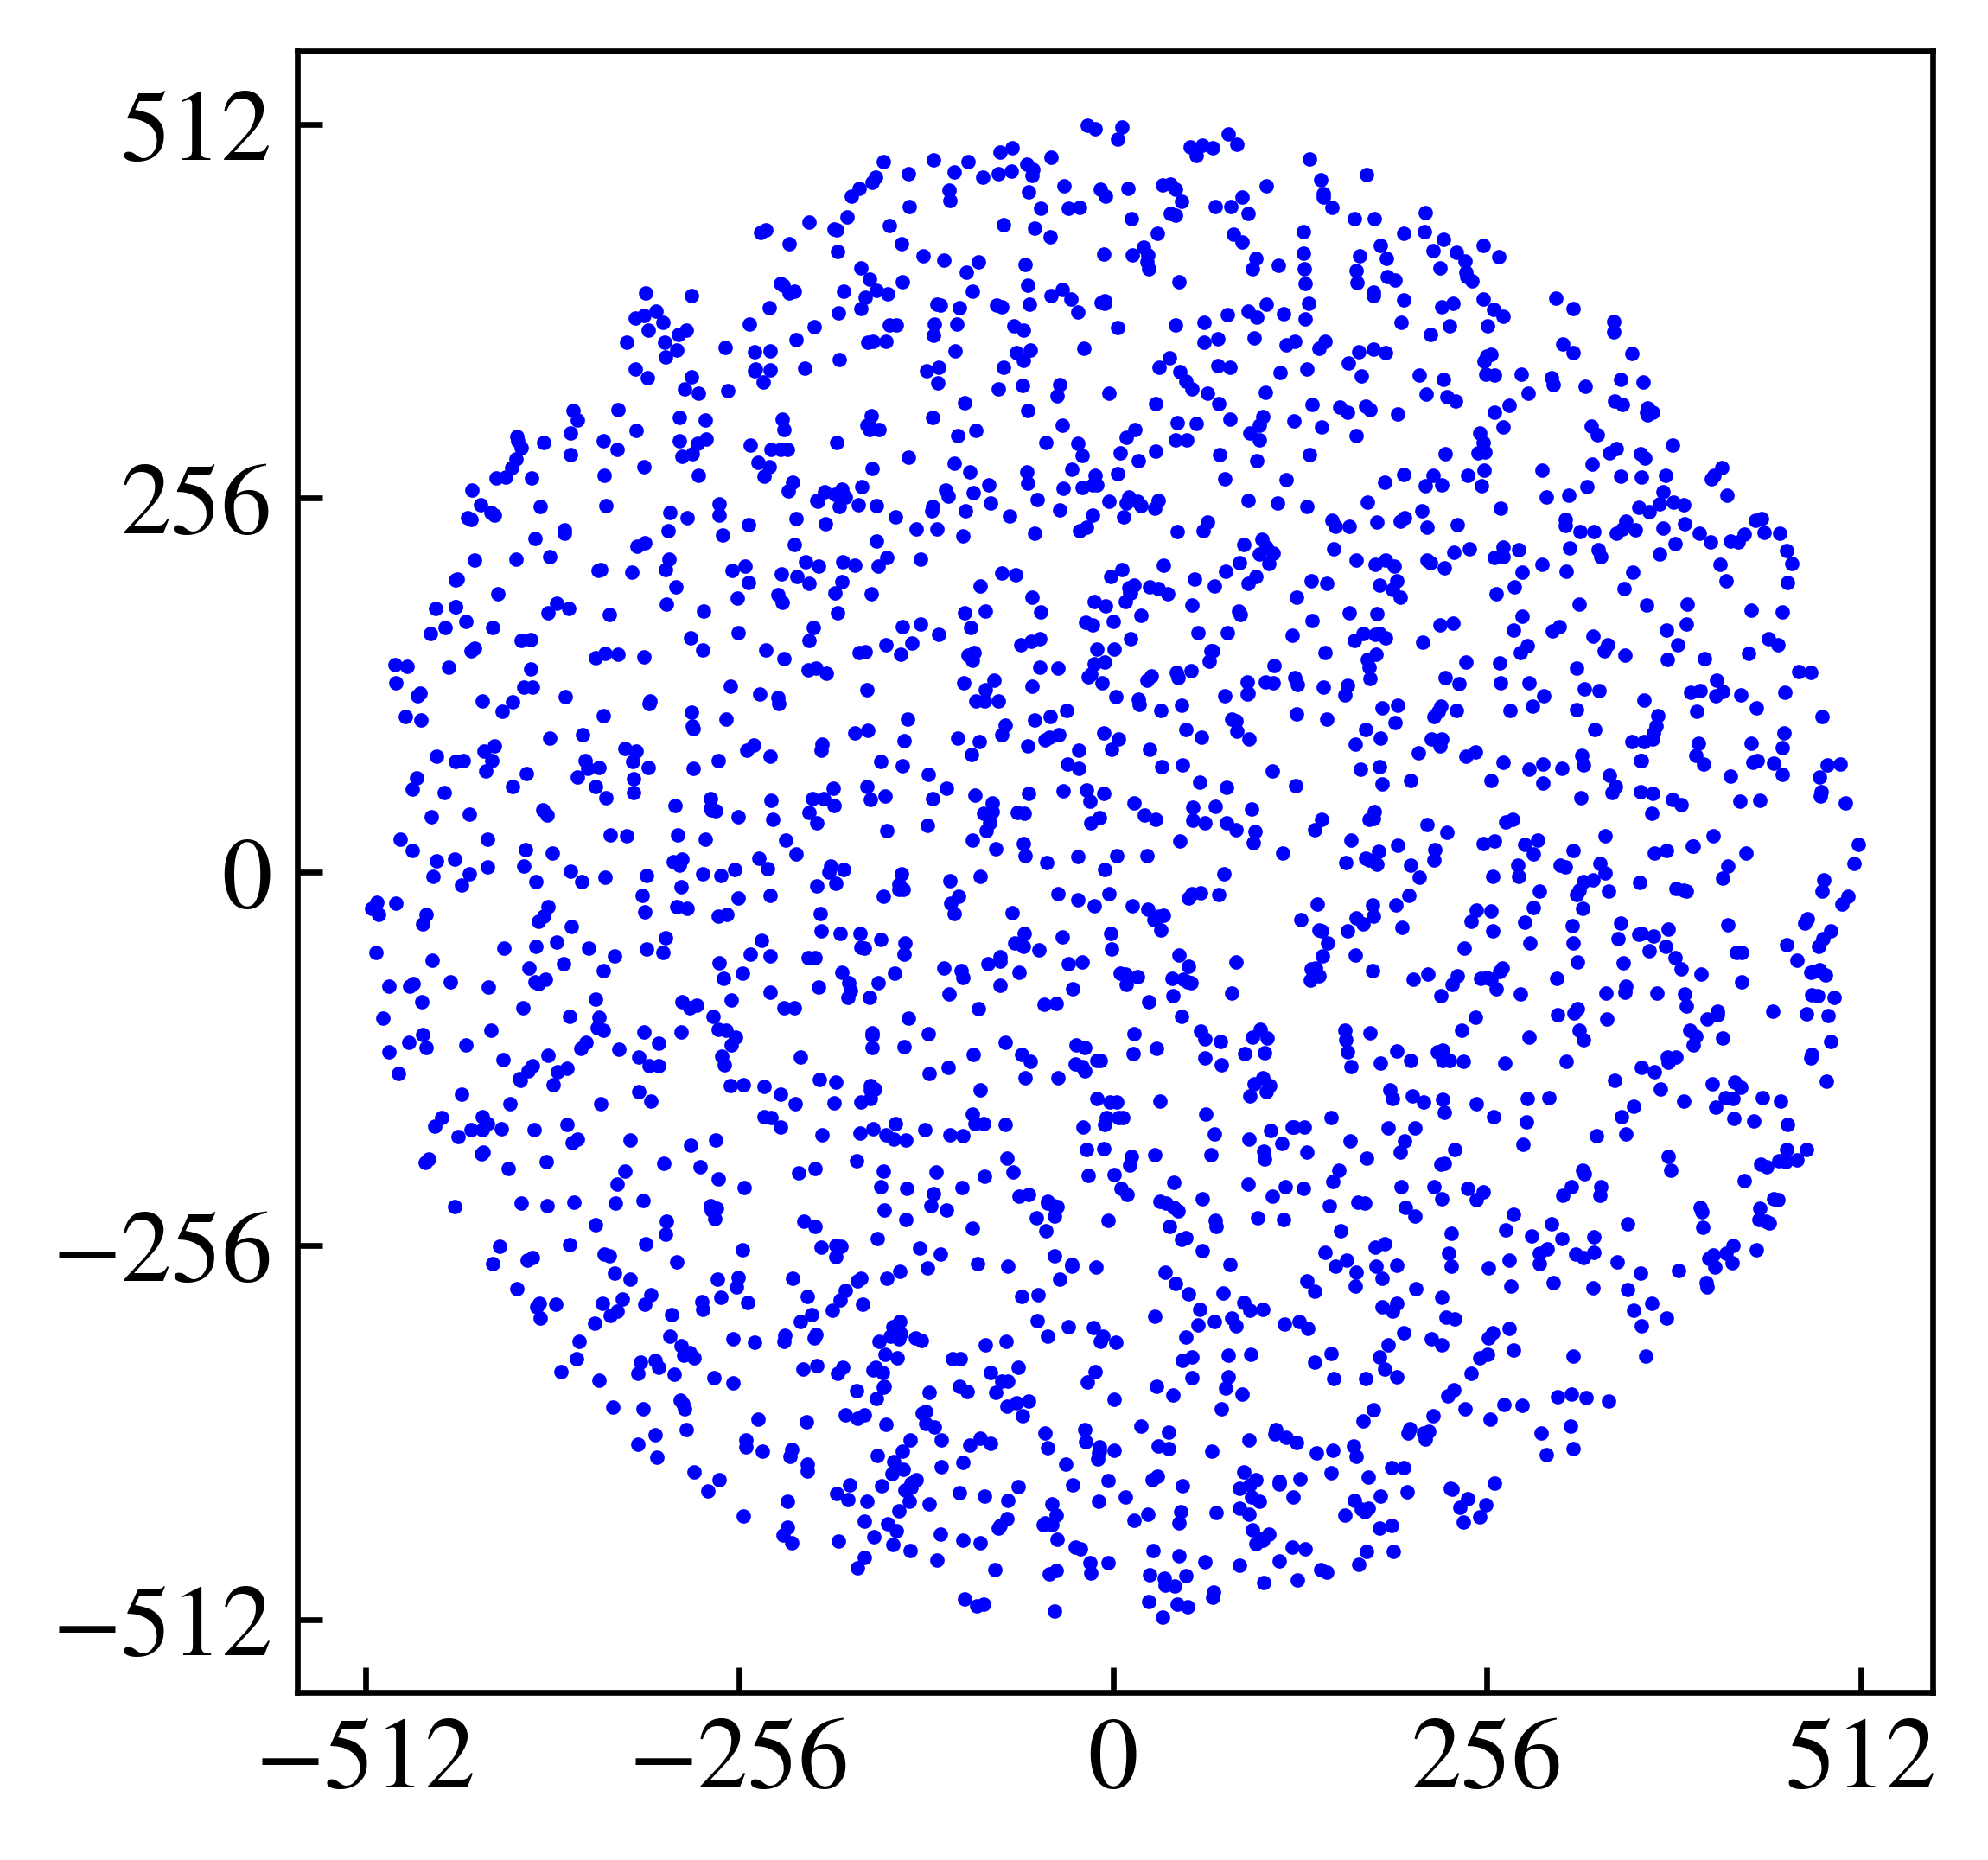

In [ ]:
point_process = HomogeneousPoissonPointProcess(intensity=0.0025)
window = BoxWindow(bounds=[[-512, 512], [-512, 512]])
point_pattern = point_process.generate_point_pattern(window=window)

pts_Poisson= point_pattern.points

print(pts_Poisson.shape)
sf_Poisson = StructureFactor(point_pattern)
# fig, ax = plt.subplots(figsize=(6,6),dpi=600)
# point_pattern.plot(axis=ax)
# ax.set_aspect("equal", "box")
# plt.tight_layout(pad=1)

points = pts_Poisson
mask = np.sqrt(points[:, 0]**2 + points[:, 1]**2) < 512
print(points[mask,0].shape)

fig, ax = plt.subplots(figsize=(4,4),dpi=600)
ax.plot(points[mask, 0], points[mask, 1], "b.", markersize=2)
ax.set_aspect("equal", "box")
plt.tight_layout(pad=1)
ax.set_xticks([-512, -256, 0, 256, 512]) 
ax.set_yticks([-512, -256, 0, 256, 512]) 
fig.savefig(output_dir_data / f"Poisson_point_process(PPP).png", dpi=600)
fig.savefig(output_dir_data / f"Poisson_point_process(PPP).pdf", dpi=600)

# --------------------------------------------------------------------
# EXPORT CENTROIDS (one point per row)
# --------------------------------------------------------------------
df = pd.DataFrame({
    "centroid_x": points[:, 0],
    "centroid_y": points[:, 1],
})

df.to_csv(output_dir_data / "Poisson_point_process.csv", index=False)
print("Saved CSV:", output_dir_data / "Poisson_point_process.csv")

/Users/qxliu/Library/CloudStorage/OneDrive-Personal/SJTU 工作/Manuscript From 2023/zhengzhu MS/Revision 20240207/New submission/Figures/Fig.2_Hyperuniform/structure_factor/tapered_estimators.py:94: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(


<Axes: xlabel='Wavenumber ($|\\mathbf{k}|$)', ylabel='Structure factor, $S(\\mathbf{k})$'>

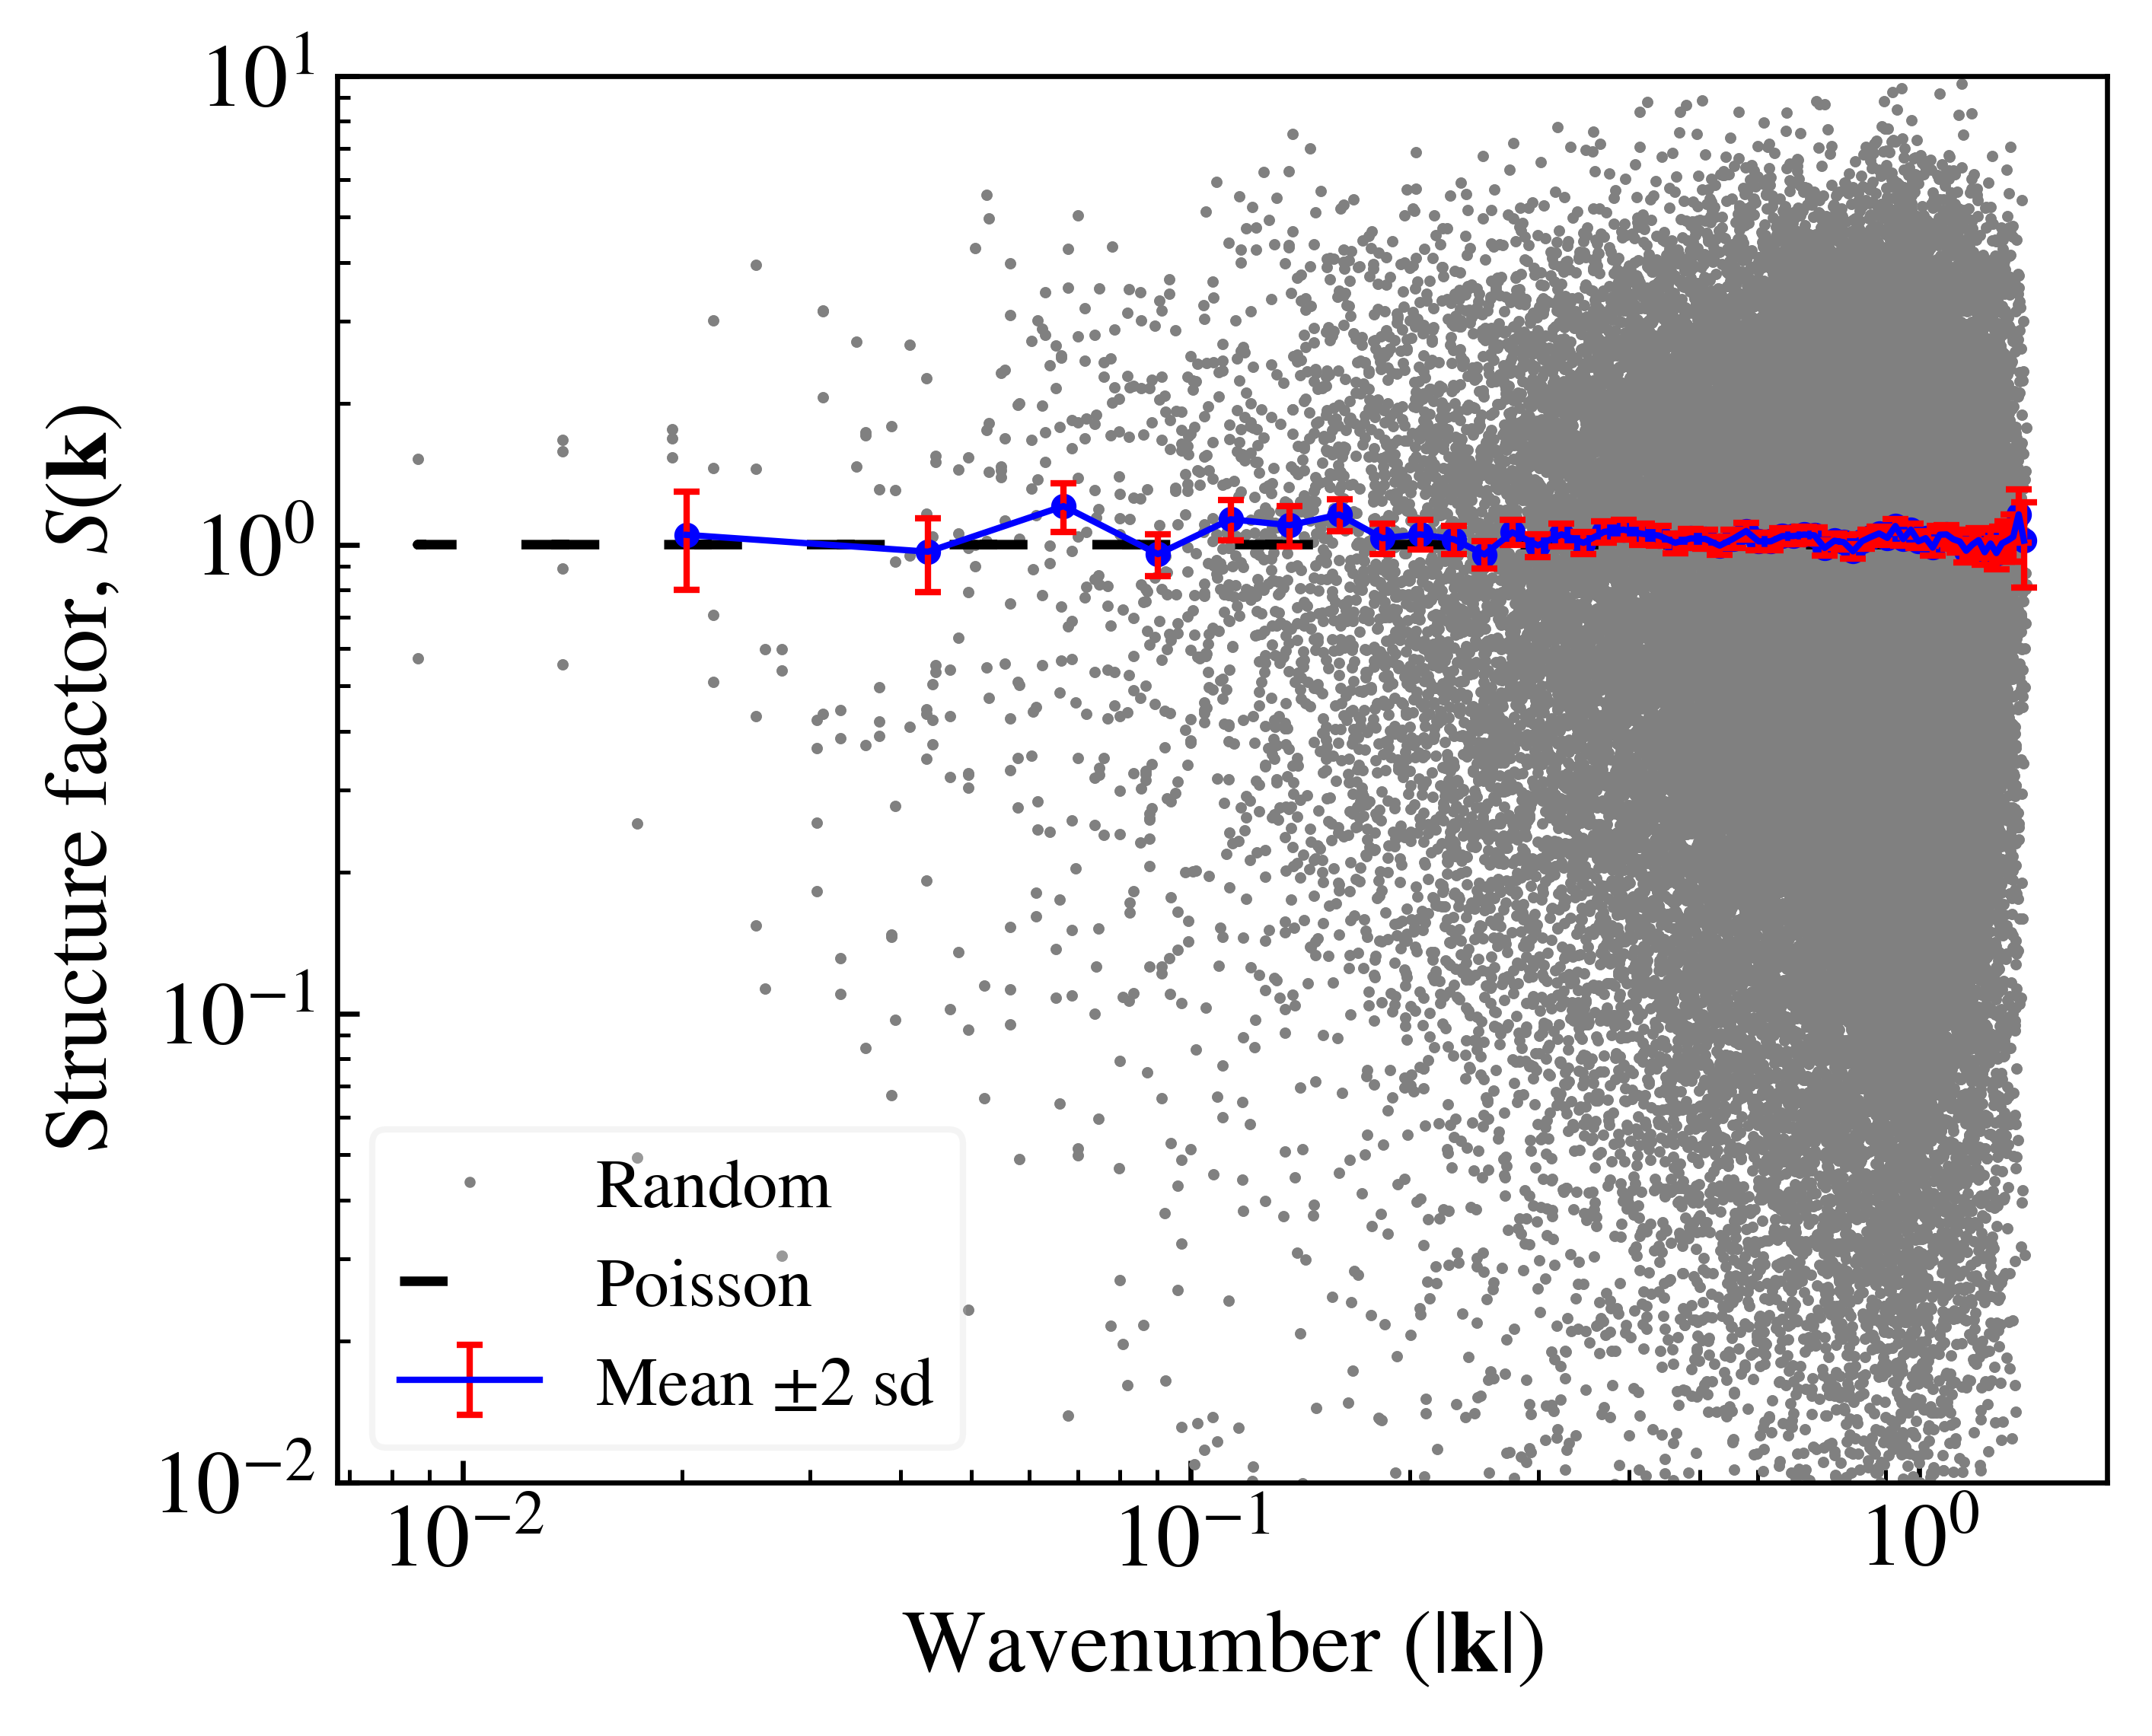

In [5]:
import matplotlib.pyplot as plt
from structure_factor.tapers import SineTaper
# Construct a grid of wavevectors
k_max=1.0 # Threshold on the maximum wavenumber
x = np.linspace(0, k_max, 100)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel())) # Wavevectors

# Scattering intensity on k 
# First taper of the family of sinusoidal tapers
p = [1, 1]
tapers = [SineTaper(p)]
k, s_si_k = sf_Poisson.scattering_intensity(k_max=k_max)

# Plot
# Standared hyperuniform poitn patterns
from structure_factor.point_processes import GinibrePointProcess
point_process2 = GinibrePointProcess()

exact_sf = point_process2.structure_factor

fig, axis = plt.subplots(figsize=(5, 4),dpi=600)
# axis.plot(k, s_si_k, "k.", label=" ", alpha = 0.6, markersize=1, rasterized=True)
axis.set_ylim([0.01,10])
sf_Poisson.plot_non_isotropic_estimator(k, s_si_k, 
                                axes=axis,
                                plot_type="radial", 
                                # exact_sf=exact_sf,
                                error_bar=True, bins=60,
                                scale="log", 
                                rasterized=True, 
                                label=r"Random", 
                                file_name=Path(f"{output_dir_data}/PoissonPointProcess"), 
                                loc_position = "lower left",
                                )

# plt.legend(loc='lower left',fontsize=11)

In [6]:
# x = np.linspace(0, 1, 120)
# x = x[x != 0]
# k = utils.meshgrid_to_column_matrix(np.meshgrid(x, x))
# k, sf_estimated = sf_Poisson.scattering_intensity(k)

# # bin_data
# k_norm = utils.norm(k)
# k_norm_binned, sf_estimated_binned, _ = bin_data(k_norm, sf_estimated,bins=100)

# fig, ax = plt.subplots(figsize=(6, 4),dpi=600)
# ax.plot(k_norm, sf_estimated, "k.", label=" ", alpha = 0.6, markersize=1, rasterized=True)
# ax.set_ylim([0.01,10])
# sf_Poisson.plot_isotropic_estimator(
#     k_norm_binned,
#     sf_estimated_binned,
#     axis=ax,
#     color="m",
#     error_bar=True,
#     bins=60,
#     # exact_sf=point_process.structure_factor,
#     # label="After regularization",
#     # file_name=Path(f"{output_dir_data}/Poisson"),
# )
# ax.legend()
# plt.tight_layout(pad=1)


## (2) GinibrePointProcess = theoretical DHU point

(4971, 2)
(1250,)
Saved CSV: Fig2_Lowrow/GinibrePointProcess.csv


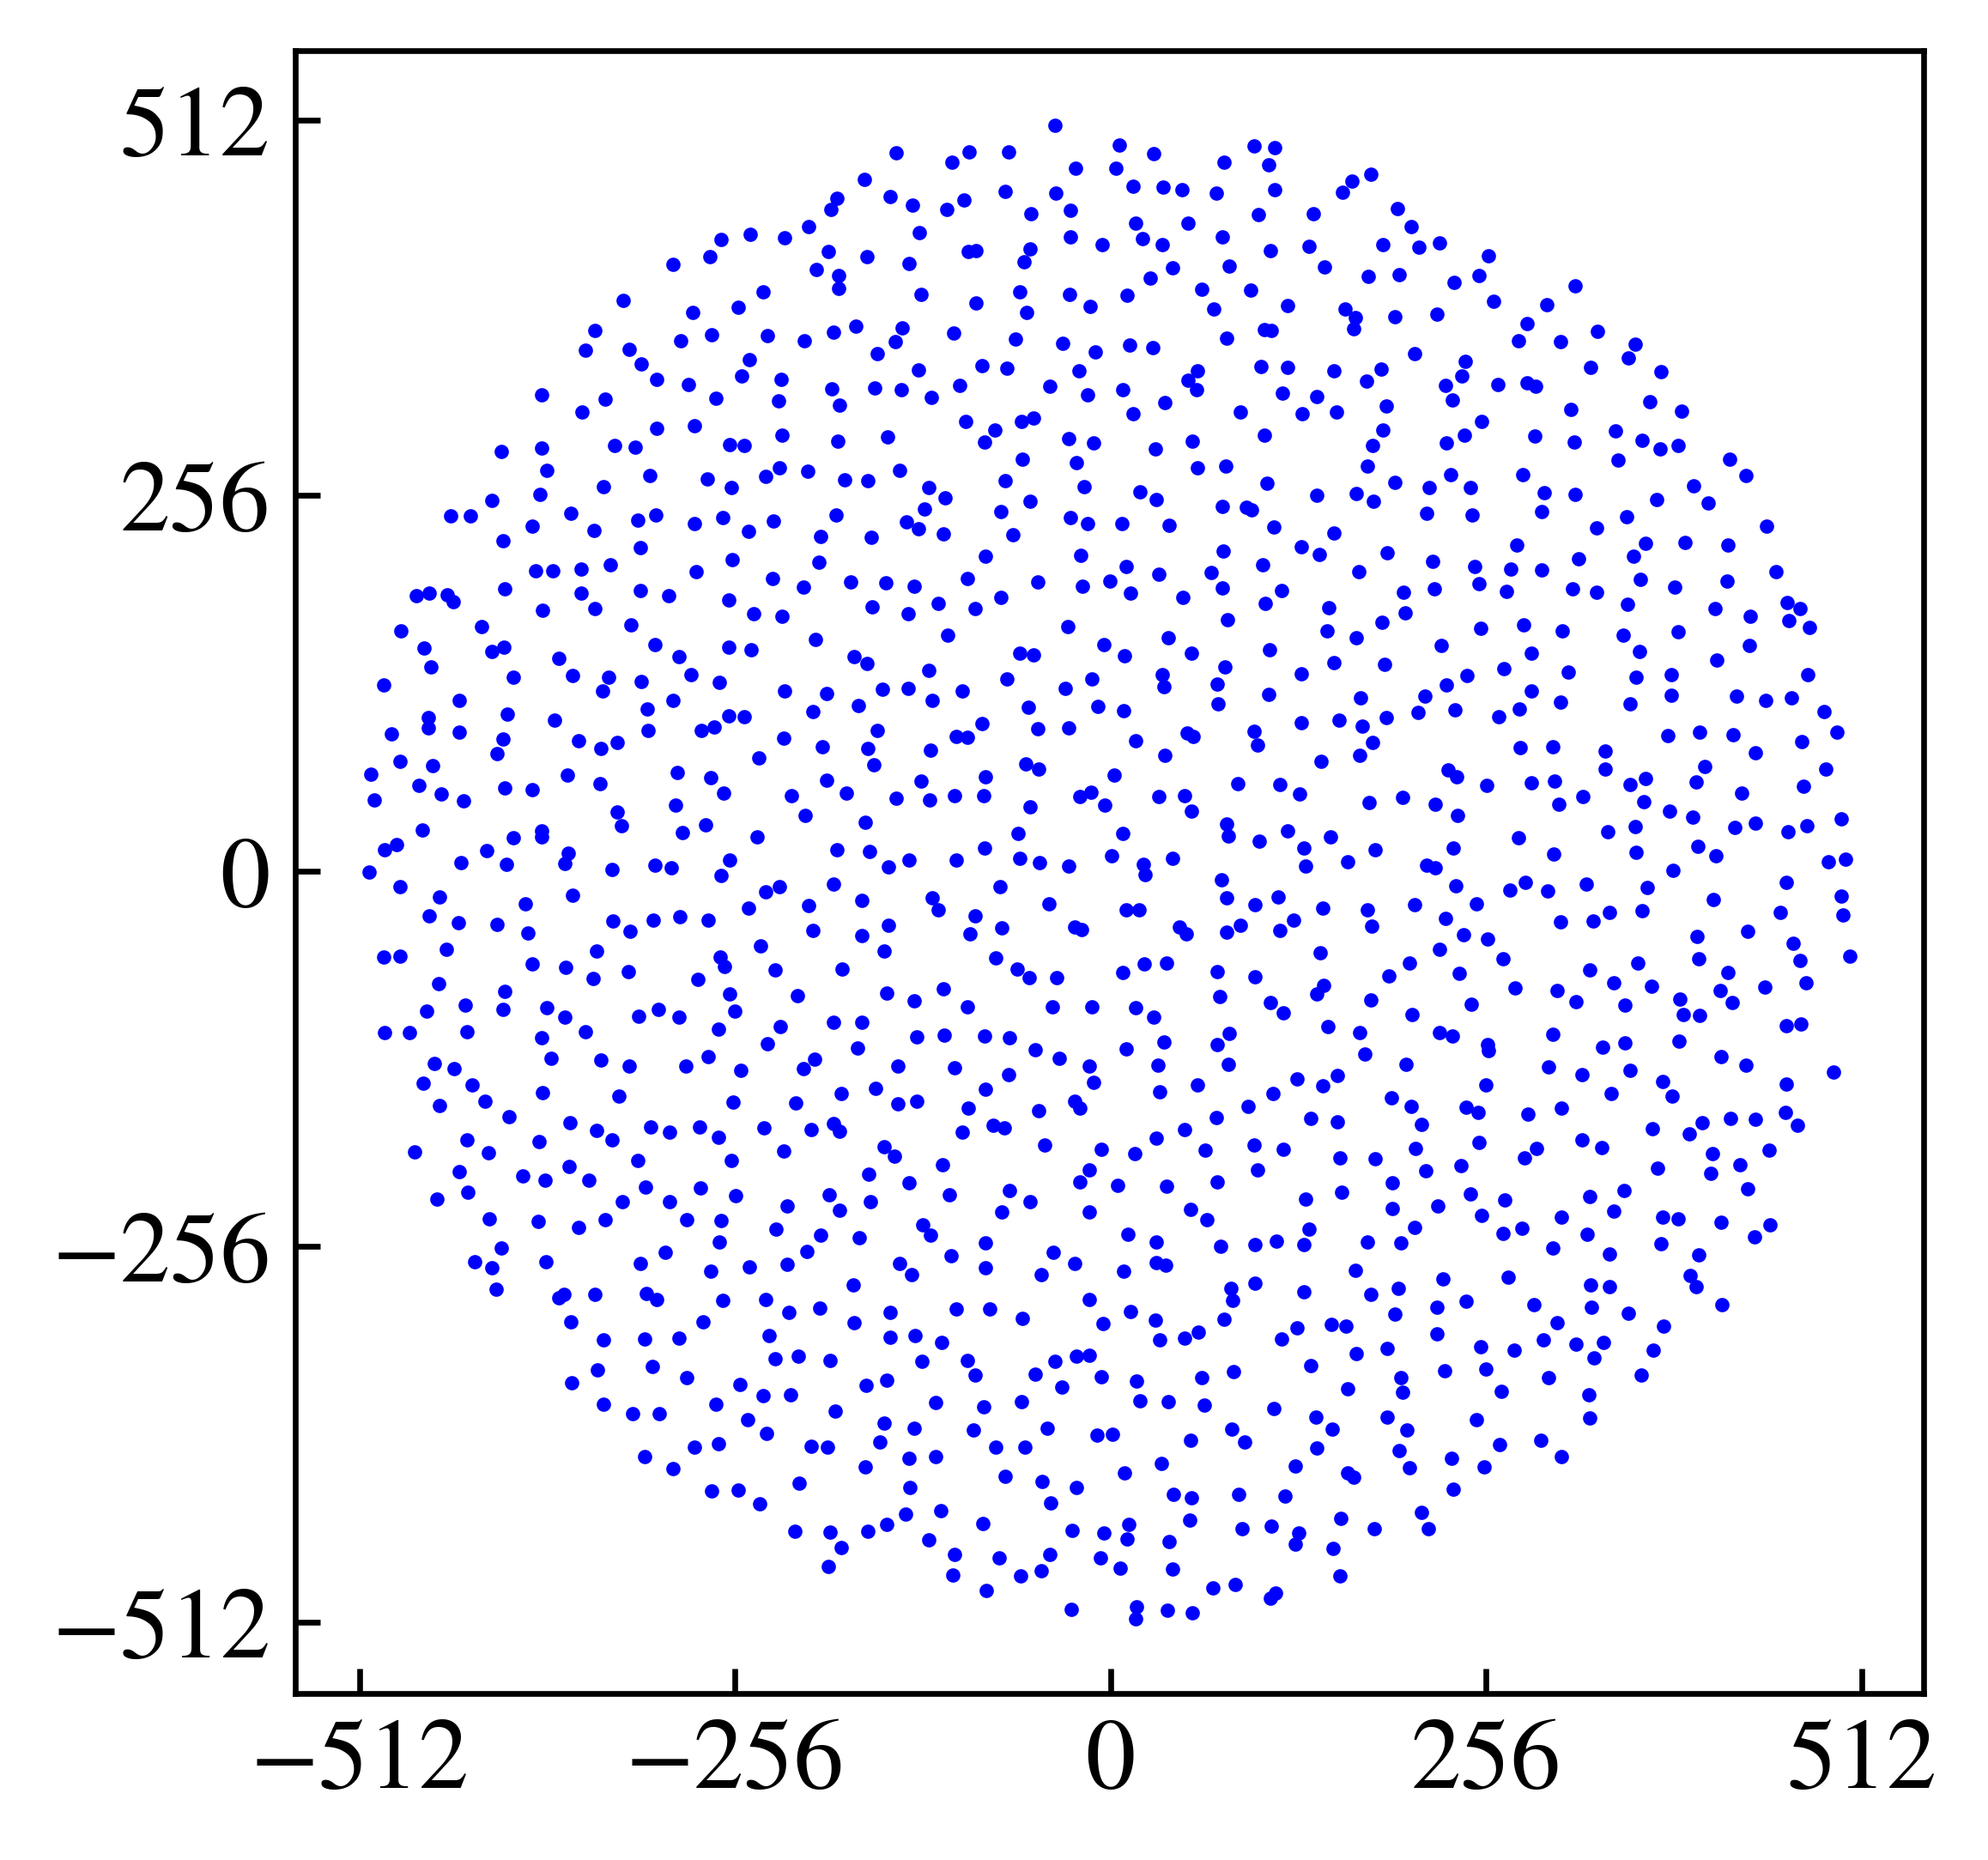

In [7]:
import matplotlib.pyplot as plt

from structure_factor.point_processes import GinibrePointProcess
from structure_factor.spatial_windows import BallWindow

def ginibre_radius_for_points(N):
    return np.sqrt(N)

N = 5000
Scale_len = 1024

R = ginibre_radius_for_points(N)

point_process = GinibrePointProcess()
window = BallWindow(center=[0, 0], radius=R)
points_Ginibre = point_process.generate_sample(window=window)
print(points_Ginibre.shape)

points = Scale_len *points_Ginibre/R
mask = np.sqrt(points[:, 0]**2 + points[:, 1]**2) < 512
print(points[mask,0].shape)

fig, ax = plt.subplots(figsize=(4,4),dpi=600)
ax.plot(points[mask, 0], points[mask, 1], "b.", markersize=2)
ax.set_aspect("equal", "box")
plt.tight_layout(pad=1)
ax.set_xticks([-512, -256, 0, 256, 512]) 
ax.set_yticks([-512, -256, 0, 256, 512]) 
fig.savefig(output_dir_data / f"GinibrePointProcess (DHU).png", dpi=600)
fig.savefig(output_dir_data / f"GinibrePointProcess (DHU).pdf", dpi=600)
# --------------------------------------------------------------------
# EXPORT CENTROIDS (one point per row)
# --------------------------------------------------------------------
df = pd.DataFrame({
    "centroid_x": points[:, 0],
    "centroid_y": points[:, 1],
})

df.to_csv(output_dir_data / "GinibrePointProcess.csv", index=False)
print("Saved CSV:", output_dir_data / "GinibrePointProcess.csv")

In [ ]:
from structure_factor.point_pattern import PointPattern
pts = points
# --------------------------------------------------
# 2) Define window = BoxWindow([...])
# --------------------------------------------------
x = pts[:,0] # orignal circel with radius=1024
y = pts[:,1]
# bounds = np.array([
#     [x.min(), x.max()],   # x-range
#     [y.min(), y.max()],   # y-range
# ])
# window = BoxWindow(bounds=bounds)
# --------------------------------------------------
# 3) Define intensity and build PointPattern
# --------------------------------------------------
mask = (np.abs(x) < 512) & (np.abs(y) < 512)
pts_filtered = pts[mask]
print(pts_filtered.shape)
N = pts_filtered.shape[0]
window = BoxWindow(bounds=[[-512, 512], [-512, 512]])

volume = window.volume             # area in 2D
intensity = N / volume      # λ = N / |W|
point_pattern = PointPattern(points=pts_filtered, window=window, intensity=intensity)
sf_Ginibre = StructureFactor(point_pattern)

# fig, ax = plt.subplots(figsize=(6,6),dpi=600)
# point_pattern.plot(axis=ax)
# ax.set_aspect("equal", "box")
# ax.set_xticks([-512, -256, 0, 256, 512]) 
# ax.set_yticks([-512, -256, 0, 256, 512])
# plt.tight_layout(pad=1)


(1592, 2)


In [9]:

# # Estimate S
# x = np.linspace(0, 1, 100)
# x = x[x != 0]
# k = utils.meshgrid_to_column_matrix(np.meshgrid(x, x))
# k, sf_estimated = sf_Ginibre.scattering_intensity(k)

# # bin_data
# k_norm = utils.norm(k)
# k_norm_binned, sf_estimated_binned, _ = bin_data(k_norm, sf_estimated,bins=80)

# fig, ax = plt.subplots(figsize=(6, 4))
# ax.plot(k_norm, sf_estimated, "k.", label=" ", alpha = 0.6, markersize=1, rasterized=True)
# ax.set_ylim([0.01,10])
# sf_Ginibre.plot_isotropic_estimator(
#     k_norm_binned,
#     sf_estimated_binned,
#     axis=ax,
#     color="m",
#     error_bar=True,
#     bins=80,
#     # exact_sf=point_process.structure_factor,
#     # label="After regularization",
# )
# ax.legend()
# plt.tight_layout(pad=1)

/Users/qxliu/Library/CloudStorage/OneDrive-Personal/SJTU 工作/Manuscript From 2023/zhengzhu MS/Revision 20240207/New submission/Figures/Fig.2_Hyperuniform/structure_factor/tapered_estimators.py:94: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(


<Axes: xlabel='Wavenumber ($|\\mathbf{k}|$)', ylabel='Structure factor, $S(\\mathbf{k})$'>

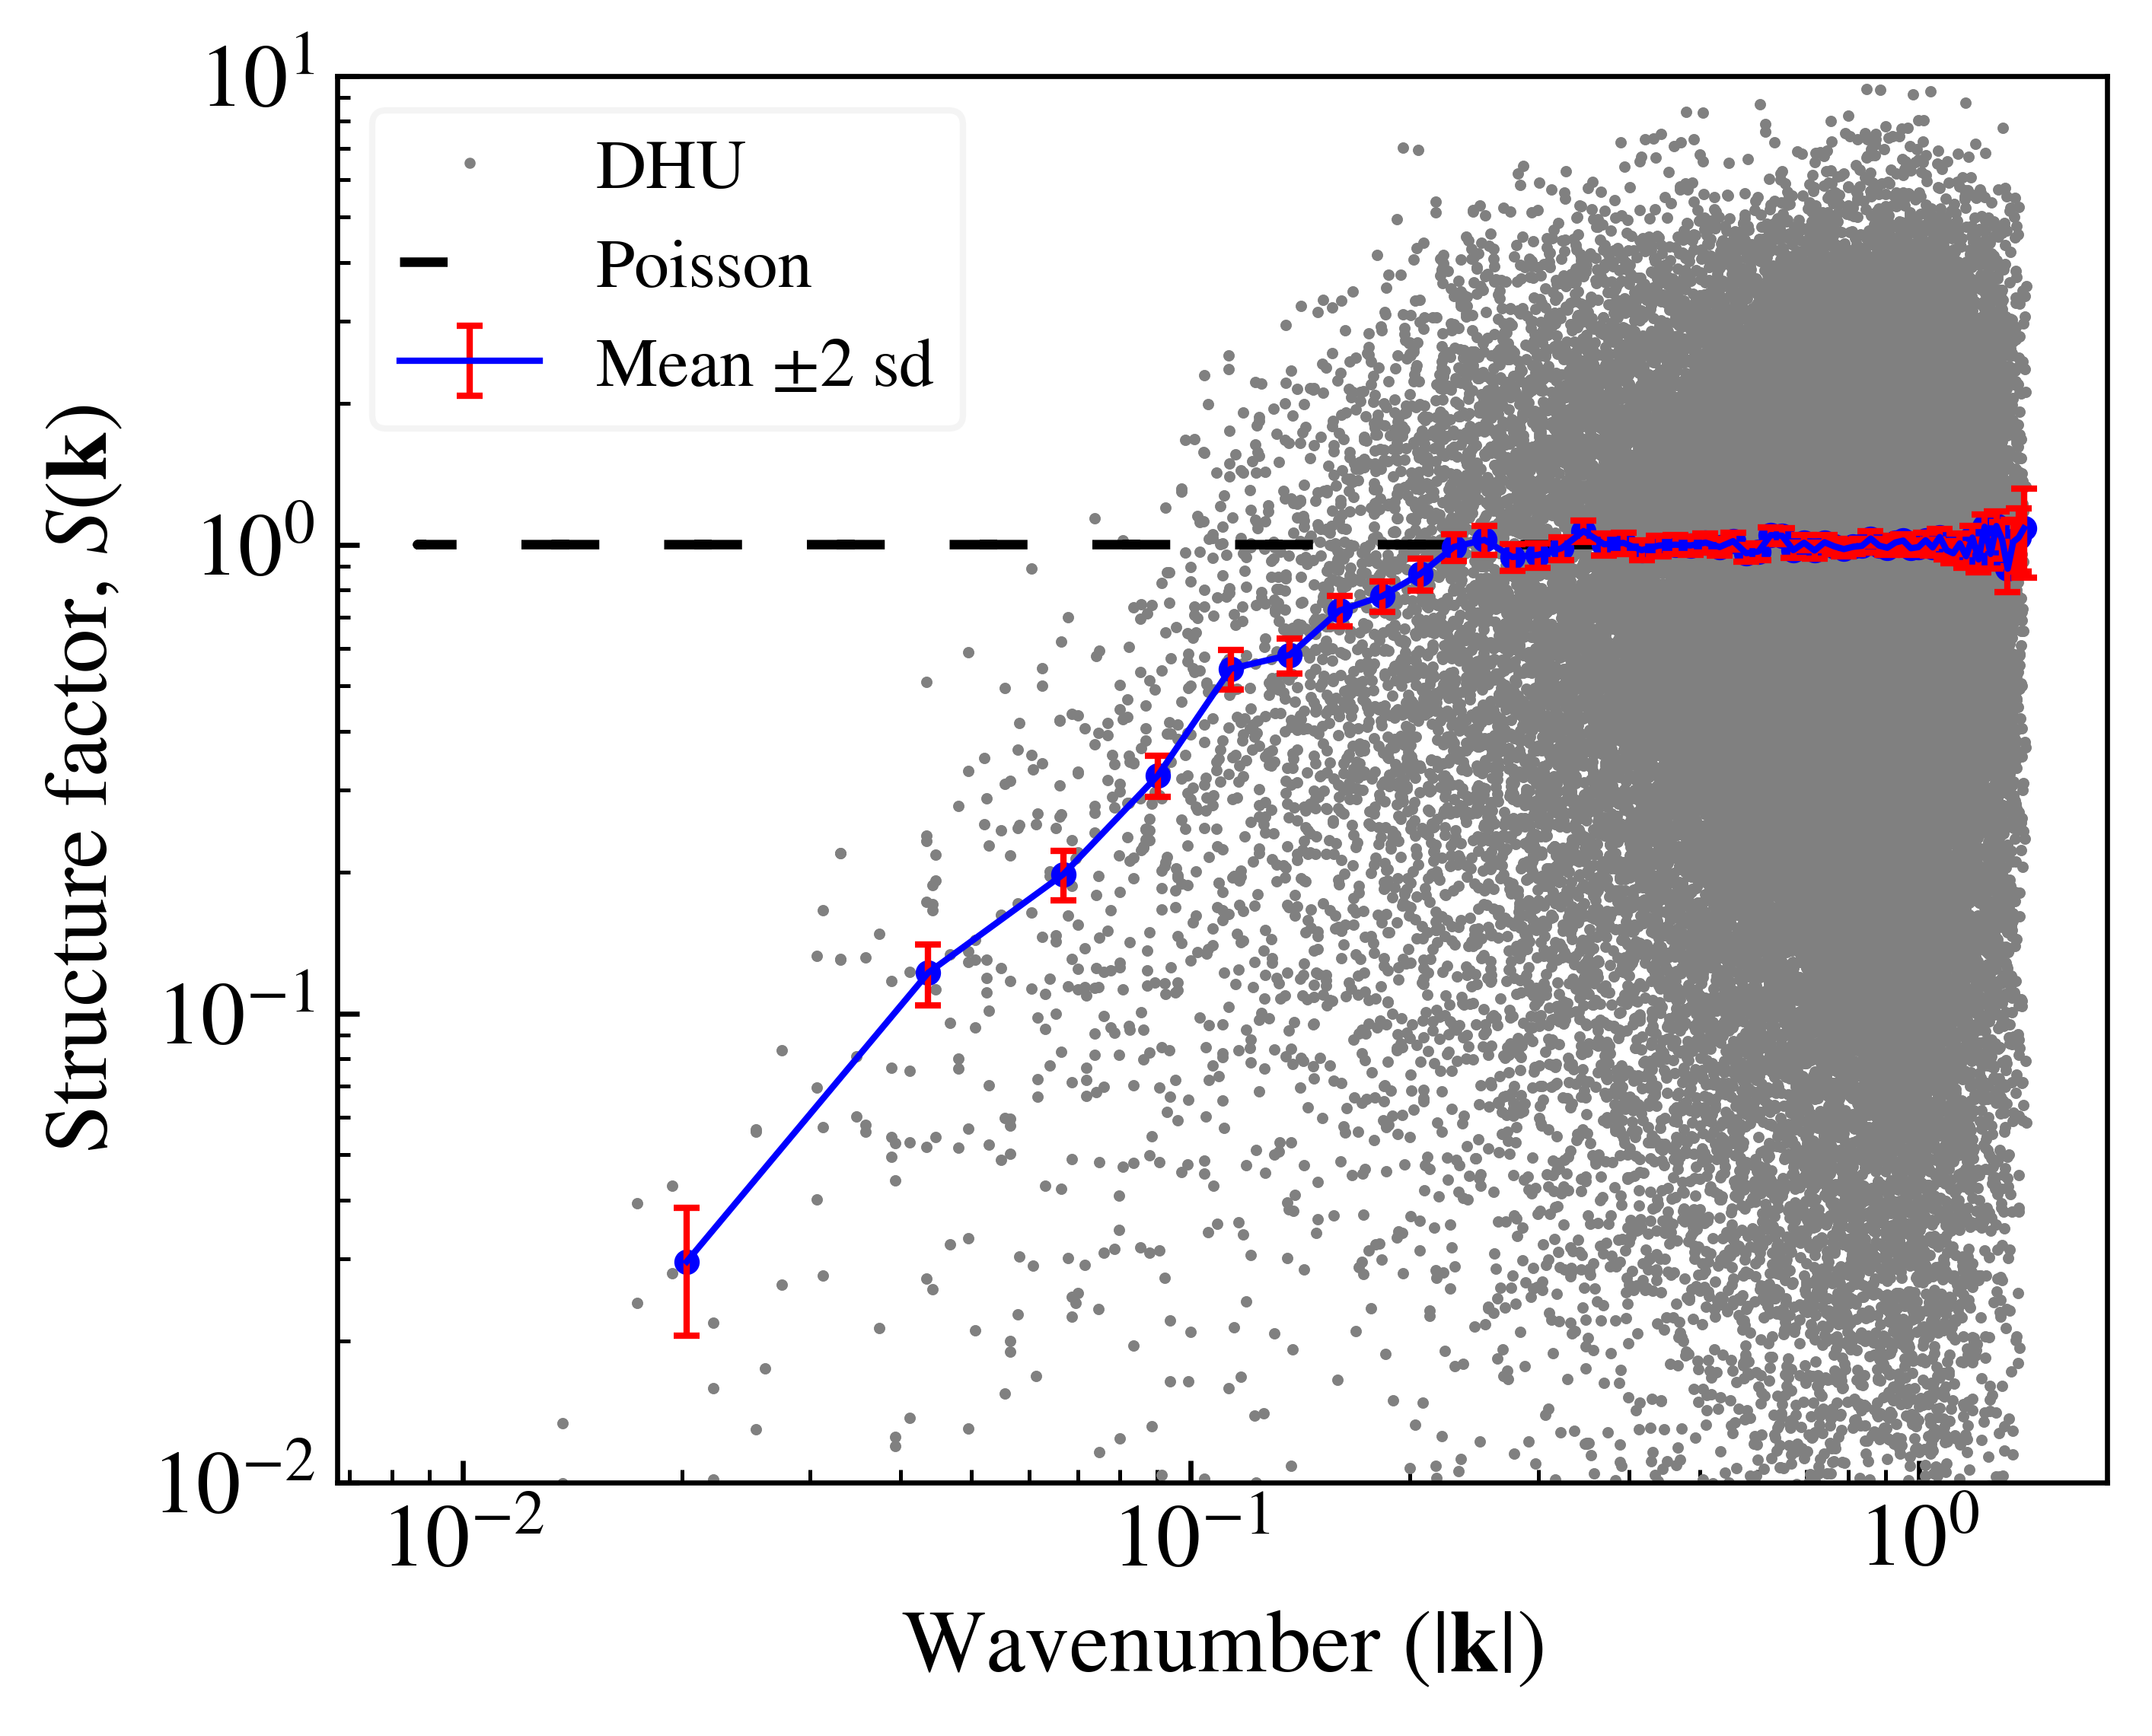

In [10]:
import matplotlib.pyplot as plt
from structure_factor.tapers import SineTaper
# Construct a grid of wavevectors
k_max=1.0 # Threshold on the maximum wavenumber
x = np.linspace(0, k_max, 100)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel())) # Wavevectors

# Scattering intensity on k 
# First taper of the family of sinusoidal tapers
p = [1, 1]
tapers = [SineTaper(p)]
k, s_si_k = sf_Ginibre.scattering_intensity(k_max=k_max)

# Plot
# Standared hyperuniform poitn patterns
# from structure_factor.point_processes import GinibrePointProcess
# point_process2 = GinibrePointProcess()
# exact_sf = point_process2.structure_factor

fig, axis = plt.subplots(figsize=(5, 4),dpi=600)
axis.set_ylim([0.01,10])
sf_Ginibre.plot_non_isotropic_estimator(k, s_si_k, 
                                axes=axis,
                                plot_type="radial", 
                                # exact_sf=exact_sf,
                                error_bar=True, bins=60,
                                scale="log", 
                                rasterized=True, 
                                label=r"DHU", 
                                file_name=Path(f"{output_dir_data}/GinibrePointProcess"), 
                                loc_position = "upper left",
                                )

# plt.legend(loc='upper left',fontsize=11)


In [11]:
# x = np.linspace(0, 1, 100)
# x = x[x != 0]
# k = utils.meshgrid_to_column_matrix(np.meshgrid(x, x))
# k, sf_estimated = sf_Ginibre.scattering_intensity(k)

# bin_num=60
# # bin_data
# k_norm = utils.norm(k)
# k_norm_binned, sf_estimated_binned, bin_std = bin_data(k_norm, sf_estimated,bins=bin_num)

# df = pd.DataFrame({
#     "bin_center": k_norm_binned,
#     "bin_mean":   sf_estimated_binned,
#     "bin_std":    bin_std
# })

# # Standared hyperuniform poitn patterns
# # from structure_factor.point_processes import GinibrePointProcess
# # point_process2 = GinibrePointProcess()
# # exact_sf = point_process2.structure_factor

# fig, ax = plt.subplots(figsize=(6, 4),dpi=600)
# ax.plot(k_norm, sf_estimated, "k.", label=" ",alpha = 0.6, markersize=1, rasterized=True)
# ax.set_ylim([0.01,10])
# sf_Ginibre.plot_isotropic_estimator(
#     k_norm_binned,
#     sf_estimated_binned,
#     axis=ax,
#     color="m",
#     error_bar=True,
#     # plot_type="radial",
#     bins=bin_num,
#     # exact_sf=point_process2.structure_factor,
#     # label="After regularization",
#     # file_name=Path(f"{output_dir_data}/GinibrePointProcess"),
# )

# Save to CSV
# file_name=Path(f"{output_dir_data}/GinibrePointProcess")
# df.to_csv(f"{file_name}_binned_statistics.csv", index=False)


### (3) ThomasPointProcess: aggregation patterns

(1801, 2)
[[-423.53059051  -58.10877223]
 [-422.1647839   -65.12663006]
 [-464.02679439  -24.64286901]
 [-416.70085672  -60.50155044]
 [-434.91732638  -18.36150981]]
Saved CSV: Fig2_Lowrow/ThomasPointProcess.csv


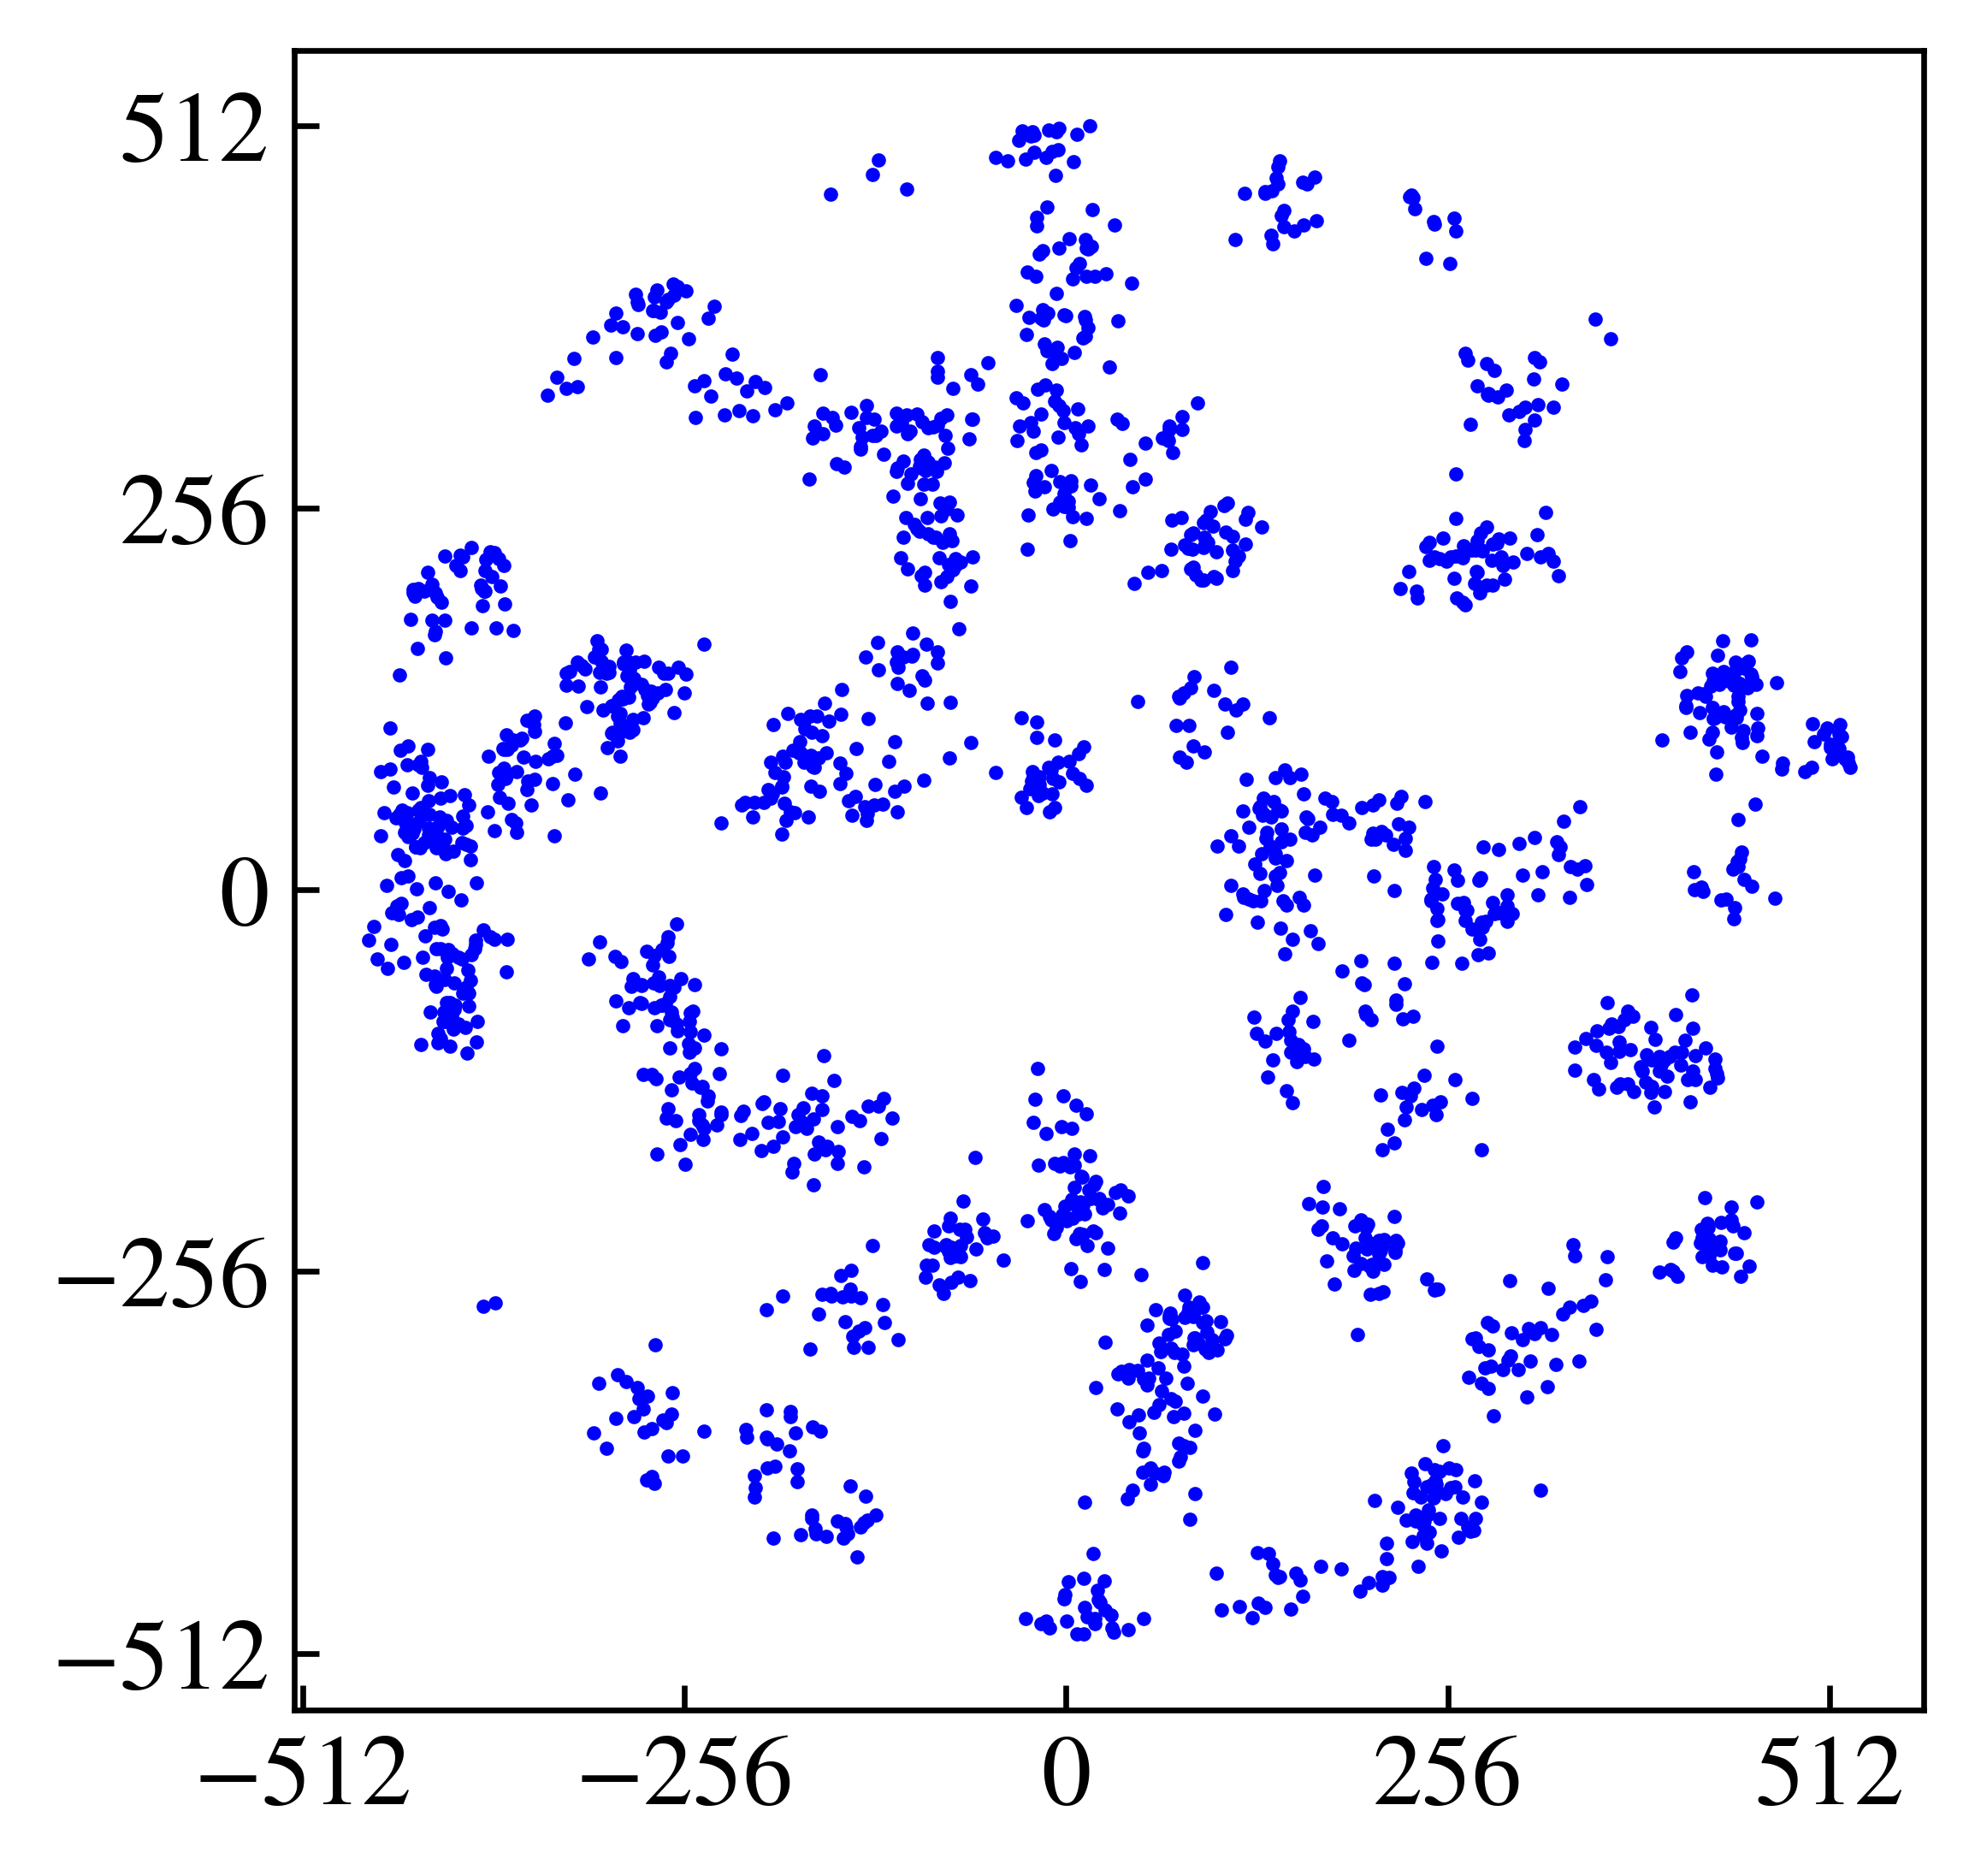

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from structure_factor.point_processes import ThomasPointProcess
from structure_factor.spatial_windows import BallWindow
import pandas as pd

N_target = 2000
radius = 60
Scale_len = 512.0

kappa_target = N_target / (np.pi * radius**2 * 20)
window = BallWindow(center=[0, 0], radius=radius)
point_process = ThomasPointProcess(kappa=kappa_target, mu=20, sigma=2)

point_pattern = point_process.generate_point_pattern(window=window)
# ax = point_pattern.plot()
# ax.set_aspect("equal", "box")
# plt.tight_layout(pad=1)

points = point_pattern.points   # <------ THE KEY LINE
points = points - np.mean(points, axis=0)
points = Scale_len *points/max(points[:,1])
print(points.shape)
print(points[:5])

fig, ax = plt.subplots(figsize=(4,4),dpi=600)
ax.plot(points[:, 0], points[:, 1], "b.",markersize=2)
ax.set_aspect("equal", "box")
plt.tight_layout(pad=1)
ax.set_xticks([-512, -256, 0, 256, 512]) 
ax.set_yticks([-512, -256, 0, 256, 512]) 
fig.savefig(output_dir_data / f"ThomasPointProcess (Aggregation).png", dpi=600)
fig.savefig(output_dir_data / f"ThomasPointProcess (Aggregation).pdf", dpi=600)
# --------------------------------------------------------------------
# EXPORT CENTROIDS (one point per row)
# --------------------------------------------------------------------
df = pd.DataFrame({
    "centroid_x": points[:, 0],
    "centroid_y": points[:, 1],
})

df.to_csv(output_dir_data / "ThomasPointProcess.csv", index=False)
print("Saved CSV:", output_dir_data / "ThomasPointProcess.csv")

In [13]:
from structure_factor.point_pattern import PointPattern
pts = points
# --------------------------------------------------
# 2) Define window = BoxWindow([...])
# --------------------------------------------------
x = pts[:,0] 
y = pts[:,1]
bounds = np.array([
    [x.min(), x.max()],   # x-range
    [y.min(), y.max()],   # y-range
])
window = BoxWindow(bounds=bounds)
# --------------------------------------------------
# 3) Define intensity and build PointPattern
# --------------------------------------------------
N = pts.shape[0]
volume = window.volume             # area in 2D
intensity = N / volume      # λ = N / |W|
point_pattern = PointPattern(points=pts, window=window, intensity=intensity)

sf_Thomas = StructureFactor(point_pattern)

# ax = point_pattern.plot()
# ax.set_aspect("equal", "box")
# plt.tight_layout(pad=1)

/Users/qxliu/Library/CloudStorage/OneDrive-Personal/SJTU 工作/Manuscript From 2023/zhengzhu MS/Revision 20240207/New submission/Figures/Fig.2_Hyperuniform/structure_factor/tapered_estimators.py:94: UserWarning: The computation on all allowed wavevectors may be time-consuming.
  warnings.warn(


<Axes: xlabel='Wavenumber ($|\\mathbf{k}|$)', ylabel='Structure factor, $S(\\mathbf{k})$'>

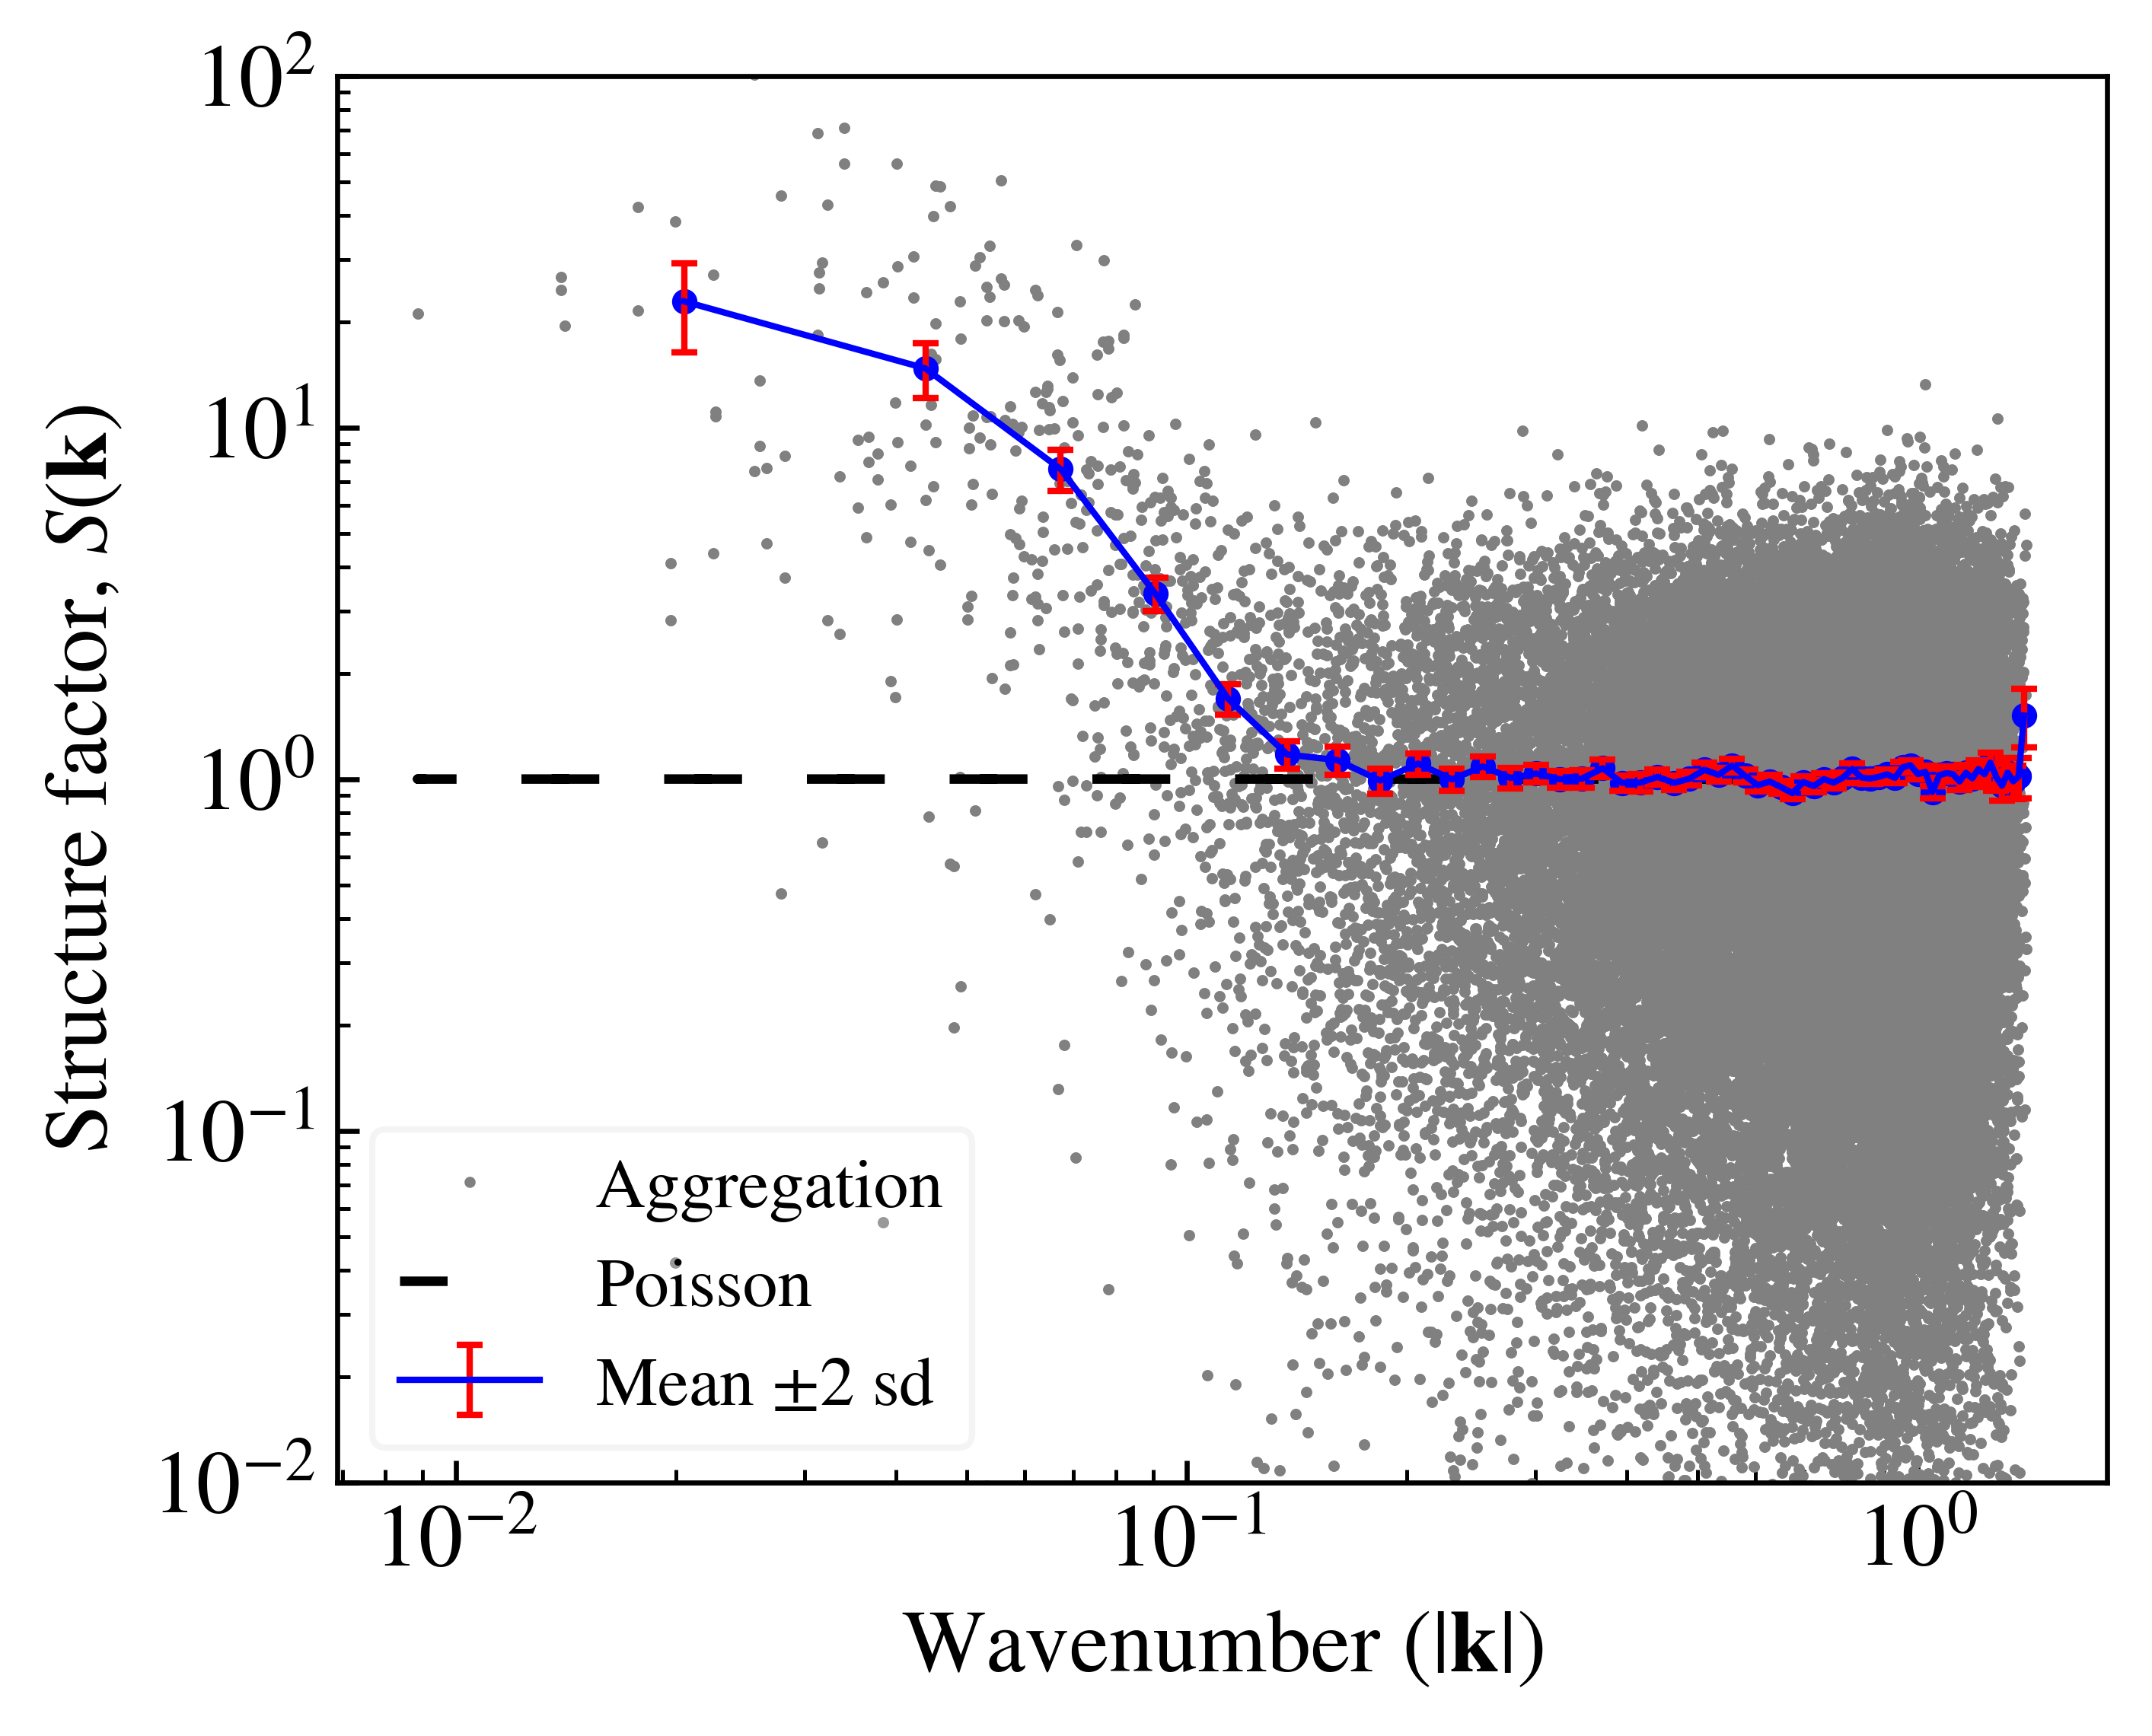

In [14]:
import matplotlib.pyplot as plt
from structure_factor.tapers import SineTaper
# Construct a grid of wavevectors
k_max=1.0 # Threshold on the maximum wavenumber
x = np.linspace(0, k_max, 100)
x = x[x != 0]
X, Y = np.meshgrid(x, x)
k = np.column_stack((X.ravel(), Y.ravel())) # Wavevectors

# Scattering intensity on k 
# First taper of the family of sinusoidal tapers
p = [1, 1]
tapers = [SineTaper(p)]
k, s_si_k = sf_Thomas.scattering_intensity(k_max=k_max)

# Plot
# Standared hyperuniform poitn patterns
# from structure_factor.point_processes import GinibrePointProcess
# point_process2 = GinibrePointProcess()
# exact_sf = point_process2.structure_factor

fig, axis = plt.subplots(figsize=(5, 4),dpi=600)
axis.set_ylim([0.01,100])
sf_Thomas.plot_non_isotropic_estimator(k, s_si_k, 
                                axes=axis,
                                plot_type="radial", 
                                # exact_sf=exact_sf,
                                error_bar=True, bins=60,
                                scale="log", 
                                rasterized=True, 
                                label=r"Aggregation", 
                                file_name=Path(f"{output_dir_data}/ThomasPointProcess"), 
                                loc_position = "lower left",
                                )

# plt.legend(loc='lower left',fontsize=11)

In [15]:
# x = np.linspace(0, 1, 100)
# x = x[x != 0]
# k = utils.meshgrid_to_column_matrix(np.meshgrid(x, x))
# k, sf_estimated = sf_Thomas.scattering_intensity(k)

# bin_num=80
# # bin_data
# k_norm = utils.norm(k)
# k_norm_binned, sf_estimated_binned, bin_std = bin_data(k_norm, sf_estimated,bins=bin_num)

# df = pd.DataFrame({
#     "bin_center": k_norm_binned,
#     "bin_mean":   sf_estimated_binned,
#     "bin_std":    bin_std
# })

# # Standared hyperuniform poitn patterns
# # from structure_factor.point_processes import GinibrePointProcess
# # point_process2 = GinibrePointProcess()
# # exact_sf = point_process2.structure_factor

# fig, ax = plt.subplots(figsize=(6, 4),dpi=600)
# ax.plot(k_norm, sf_estimated, "k.", label=" ",alpha = 0.6, markersize=1, rasterized=True)
# ax.set_ylim([0.01,40]) 
# sf_Thomas.plot_isotropic_estimator(
#     k_norm_binned,
#     sf_estimated_binned,
#     axis=ax,
#     color="m",
#     error_bar=True,
#     # plot_type="radial",
#     bins=60,
#     # exact_sf=point_process2.structure_factor,
#     # label="After regularization",
#     # file_name=Path(f"{output_dir_data}/ThomasPointProcess"),
# )

# Save to CSV
# file_name=Path(f"{output_dir_data}/ThomasPointProcess")
# df.to_csv(f"{file_name}_binned_statistics.csv", index=False)